# Anova for our analysis
We run an anova to compare ethnicities and emotions, each combination of those. We have to leave out the asians unfortunately:(

# Load in packages 

In [80]:
import numpy as np
import mne
from pathlib import Path
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import mixedlm

## Load in the data and epochs

In [81]:
# ALL FROM LAURAS GROUP LEVEL ANALYSIS
# Define the directory
data_path = Path("/Users/lina/Documents/GitHub/ore_EEG/epochs")

# Initialize an empty list to store epochs objects
all_epochs = []

# Iterate over your saved files and load them into epochs objects
for participant in ["own_sub1", "own2_ah"]:
    # Load epochs data from each file
    epochs = mne.read_epochs(data_path / f"epochs_{participant}-epo.fif", verbose=False, preload=True)
    
    # Only keep EEG channels
    epochs.pick_types(eeg=True)
    
    # Append the loaded epochs object to the list
    all_epochs.append(epochs)

# Check the type and length of the list of epochs objects
print(type(all_epochs))  # We have now created a list of epochs objects
print(len(all_epochs))    # We have 2 epochs objects in the list

# Access the first epochs object in the list
print(type(all_epochs[0]))  # We can access the first epochs object in the list which is an Epochs object

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
<class 'list'>
2
<class 'mne.epochs.EpochsFIF'>


# N170

## Define channels and time used for the anova

In [82]:
# chosen channels for anova
picks = ['TP9', 'P7', 'P8', 'TP10'] # just random 

# time window for anova
tmin = 0.13
tmax = 0.21

## Define Factors

In [83]:
# make lists for labels in conditions
ethnicity_labels = ['white', 'black']
emotion_labels = ['happy', 'neutral', 'sad']
data = []

# WE want combinations of ethnicity and emotion, so we loop over all of the epochs conditions
## ADDED SUBJECT HERE
for i, epochs in enumerate(all_epochs):
    for ethnicity in ethnicity_labels:
        for emotion in emotion_labels:
                current_epochs = epochs[f'{emotion}/{ethnicity}']
                data_current = current_epochs.get_data(picks=picks, tmin=tmin, tmax=tmax)
                data_mean = np.mean(data_current, axis=(0, 1, 2))
                # append the mean data, labels, and subject ID to the list
                data.append([i, ethnicity, emotion, data_mean])

# Make to dataframe
df = pd.DataFrame(data, columns=['Subject', 'Ethnicity', 'Emotion', 'Mean'])

# see hot it looks
print(df)

    Subject Ethnicity  Emotion        Mean
0         0     white    happy  0.00000166
1         0     white  neutral  0.00000089
2         0     white      sad  0.00000019
3         0     black    happy  0.00000125
4         0     black  neutral  0.00000155
5         0     black      sad -0.00000025
6         1     white    happy  0.00000091
7         1     white  neutral  0.00000100
8         1     white      sad  0.00000157
9         1     black    happy  0.00000089
10        1     black  neutral  0.00000120
11        1     black      sad  0.00000179


# Perform anova

In [84]:
# Fit model with subject as group level
model = mixedlm('Mean ~ C(Ethnicity) * C(Emotion)', data=df, groups=df['Subject'])
anova_results = model.fit()

# Print the summary of the model
summary = anova_result.summary().as_latex()
print(summary)

\begin{table}
\caption{Mixed Linear Model Regression Results}
\label{}
\begin{center}
\begin{tabular}{llll}
\hline
Model:            & MixedLM & Dependent Variable: & Mean     \\
No. Observations: & 12      & Method:             & REML     \\
No. Groups:       & 2       & Scale:              & 0.0000   \\
Min. group size:  & 6       & Log-Likelihood:     & 74.5061  \\
Max. group size:  & 6       & Converged:          & Yes      \\
Mean group size:  & 6.0     &                     &          \\
\hline
\end{tabular}
\end{center}

\begin{center}
\begin{tabular}{lrrrrrr}
\hline
                                            &  Coef. & Std.Err. &      z & P$> |$z$|$ & [0.025 & 0.975]  \\
\hline
Intercept                                   &  0.000 &    0.000 &  3.021 &       0.003 &  0.000 &  0.000  \\
C(Ethnicity)[T.white]                       & -0.000 &    0.000 & -0.188 &       0.851 & -0.000 &  0.000  \\
C(Emotion)[T.neutral]                       & -0.000 &    0.000 & -1.416 &       0.157

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

## Plot

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

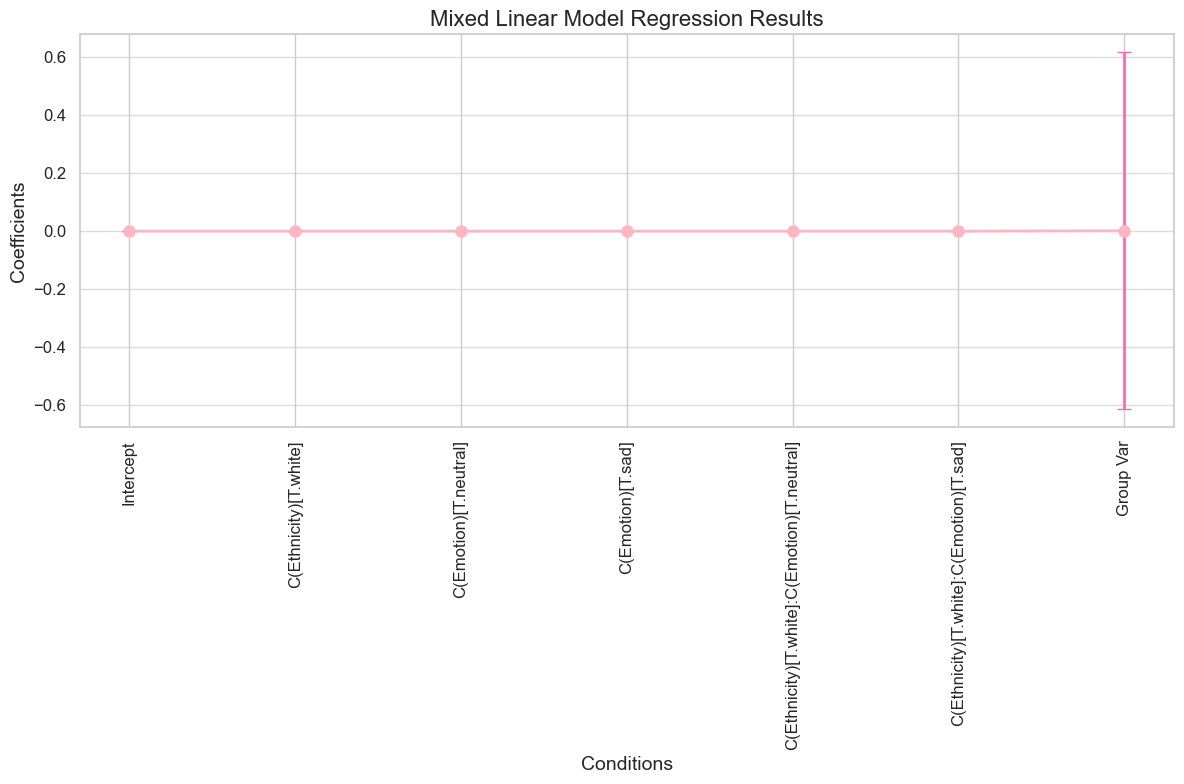

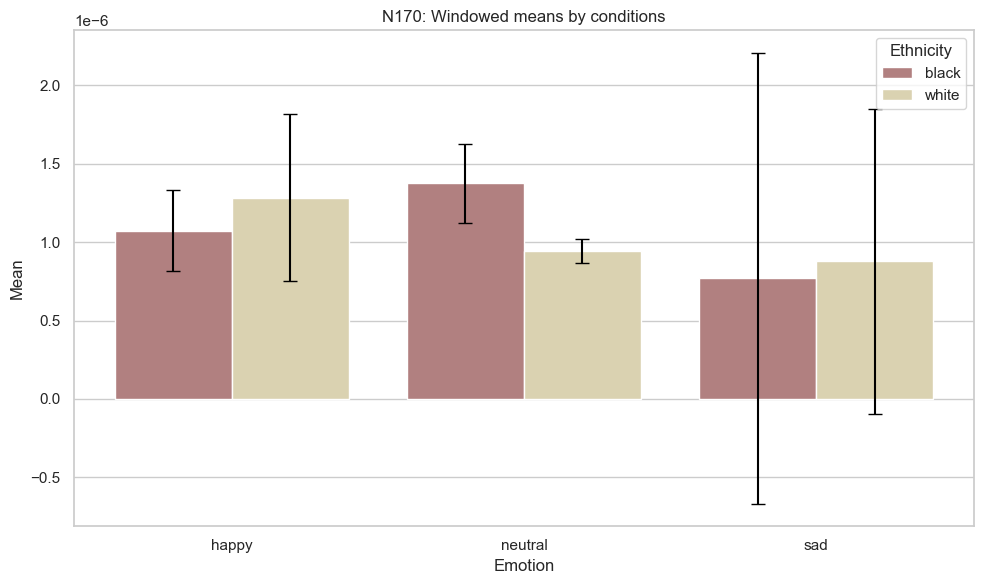

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Assuming df is already defined and loaded with data
# Fit the model
model = mixedlm('Mean ~ C(Ethnicity) * C(Emotion)', data=df, groups=df['Subject'])
anova_results = model.fit()

# Extract coefficients and standard errors from the fitted model
params = anova_results.params
std_err = anova_results.bse

# Extract conditions from the model summary
conditions = params.index.tolist()

# Plot with error bars
plt.figure(figsize=(12, 8))
plt.errorbar(range(len(params)), params, yerr=std_err, fmt='o', markersize=8, capsize=5, color='lightpink', ecolor='hotpink', linestyle='-', linewidth=2)
plt.title("Mixed Linear Model Regression Results", fontsize=16)
plt.xlabel("Conditions", fontsize=14)
plt.ylabel("Coefficients", fontsize=14)
plt.xticks(ticks=range(len(conditions)), labels=conditions, rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()



### PLOT MEAN
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean and standard deviation for each combination of Ethnicity and Emotion
mean_data = df.groupby(['Ethnicity', 'Emotion'])['Mean'].mean().reset_index()
std_data = df.groupby(['Ethnicity', 'Emotion'])['Mean'].std().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(x="Emotion", y="Mean", hue="Ethnicity", data=mean_data, palette='pink')

# Add custom error bars
for i, bar in enumerate(plt.gca().patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.errorbar(x, y, yerr=std_data.iloc[i]['Mean'], color='black', capsize=5)

plt.title("N170: Windowed means by conditions")
plt.xlabel("Emotion")
plt.ylabel("Mean")
plt.tight_layout()
plt.show()

## Plot n170


combining channels using GFP (eeg channels)


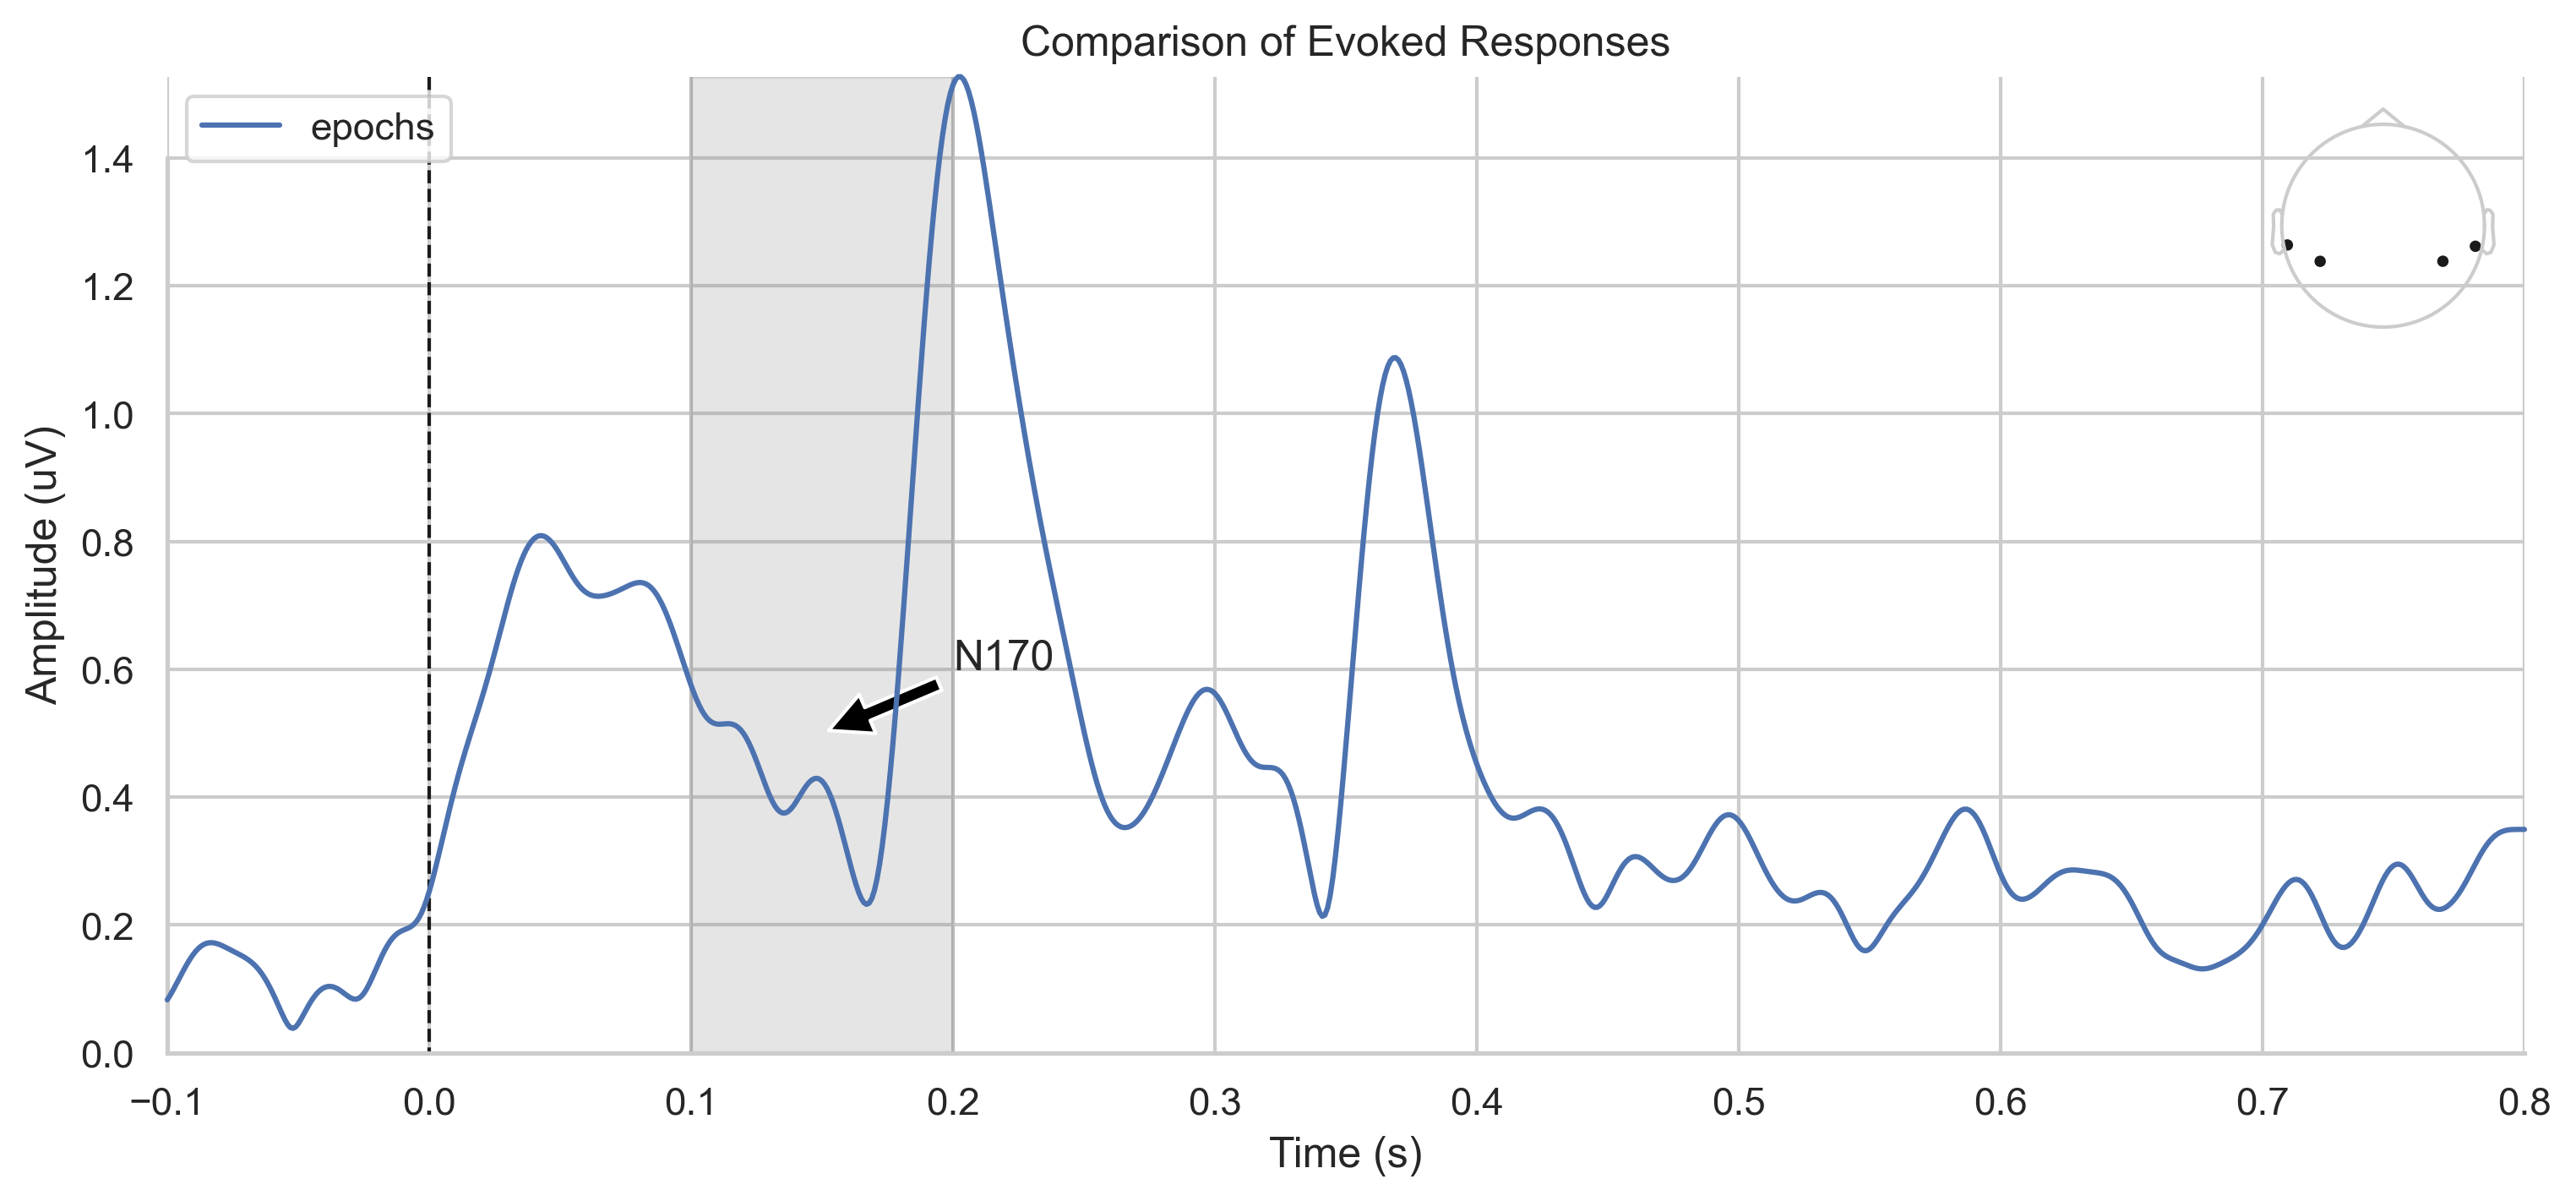

In [86]:
fig, ax = plt.subplots(1,1, figsize = (12,5), dpi=300)
# using the mne functions 

mne.viz.plot_compare_evokeds(
    {'epochs':all_epochs[1].average(picks=picks)}, 
    axes = ax, 
    show = False,
    show_sensors = True
)
# Add a shaded area to highlight a specific time interval
ax.axvspan(0.1, 0.2, color='grey', alpha=0.2)

# Customize aesthetics
ax.set_title('Comparison of Evoked Responses')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (uV)')
ax.grid(True)
ax.legend(loc='upper left')

# Add annotations
ax.annotate('N170', xy=(0.15, 0.5), xytext=(0.2, 0.6),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plot
plt.show()

# EPN

In [87]:
# chosen channels for anova
picks = ['P7', 'O1', 'Oz', 'O2', 'P8'] 

# time window for anova
tmin = 0.21
tmax = 0.35

# make lists for labels in conditions
ethnicity_labels = ['white', 'black']
emotion_labels = ['happy', 'neutral', 'sad']
data = []

# WE want combinations of ethnicity and emotion, so we loop over all of the epochs conditions
## ADDED SUBJECT HERE
for i, epochs in enumerate(all_epochs):
    for ethnicity in ethnicity_labels:
        for emotion in emotion_labels:
                current_epochs = epochs[f'{emotion}/{ethnicity}']
                data_current = current_epochs.get_data(picks=picks, tmin=tmin, tmax=tmax)
                data_mean = np.mean(data_current, axis=(0, 1, 2))
                # append the mean data, labels, and subject ID to the list
                data.append([i, ethnicity, emotion, data_mean])

# Make to dataframe
df = pd.DataFrame(data, columns=['Subject', 'Ethnicity', 'Emotion', 'Mean'])

## FIT ANOVA

# Fit model with subject as group level
model = mixedlm('Mean ~ C(Ethnicity) * C(Emotion)', data=df, groups=df['Subject'])
anova_result = model.fit()

# Print the summary of the model
summary = anova_result.summary().as_latex()
print(summary)



\begin{table}
\caption{Mixed Linear Model Regression Results}
\label{}
\begin{center}
\begin{tabular}{llll}
\hline
Model:            & MixedLM & Dependent Variable: & Mean     \\
No. Observations: & 12      & Method:             & REML     \\
No. Groups:       & 2       & Scale:              & 0.0000   \\
Min. group size:  & 6       & Log-Likelihood:     & 75.8114  \\
Max. group size:  & 6       & Converged:          & Yes      \\
Mean group size:  & 6.0     &                     &          \\
\hline
\end{tabular}
\end{center}

\begin{center}
\begin{tabular}{lrrrrrr}
\hline
                                            &  Coef. & Std.Err. &      z & P$> |$z$|$ & [0.025 & 0.975]  \\
\hline
Intercept                                   &  0.000 &    0.000 &  0.570 &       0.569 & -0.000 &  0.000  \\
C(Ethnicity)[T.white]                       &  0.000 &    0.000 &  0.781 &       0.435 & -0.000 &  0.000  \\
C(Emotion)[T.neutral]                       &  0.000 &    0.000 &  1.908 &       0.056

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


# Plot

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


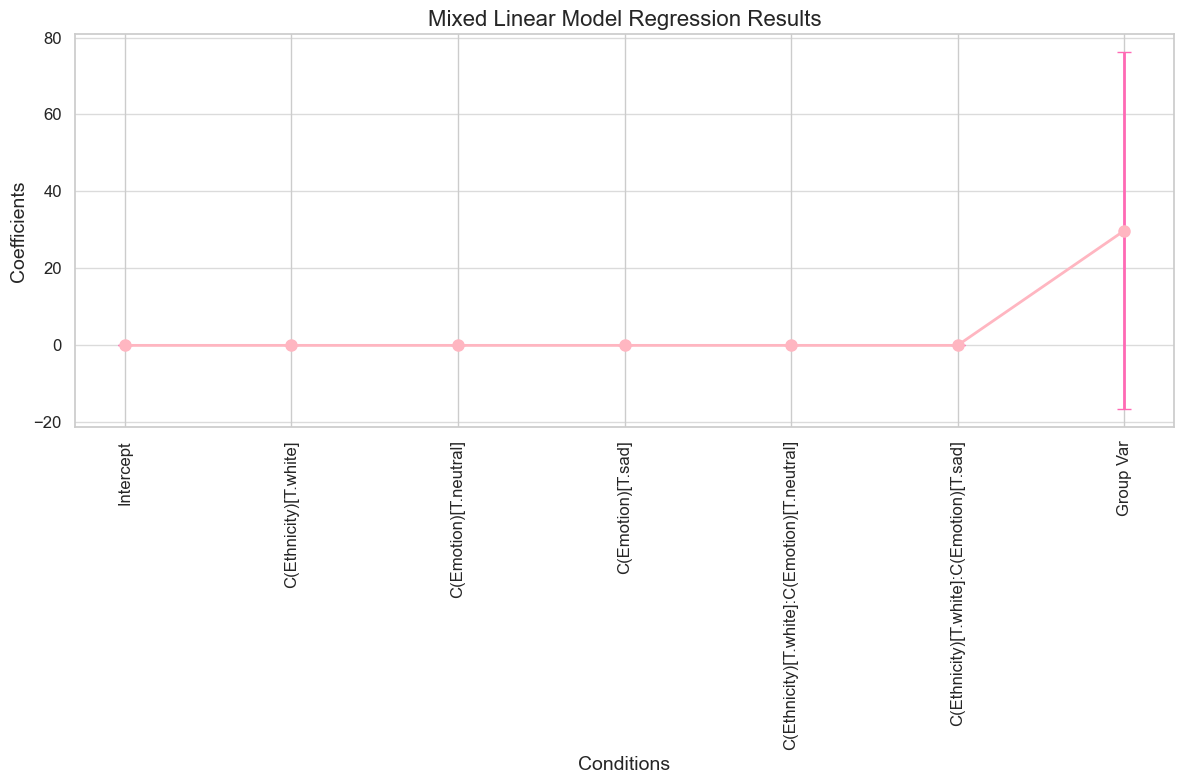

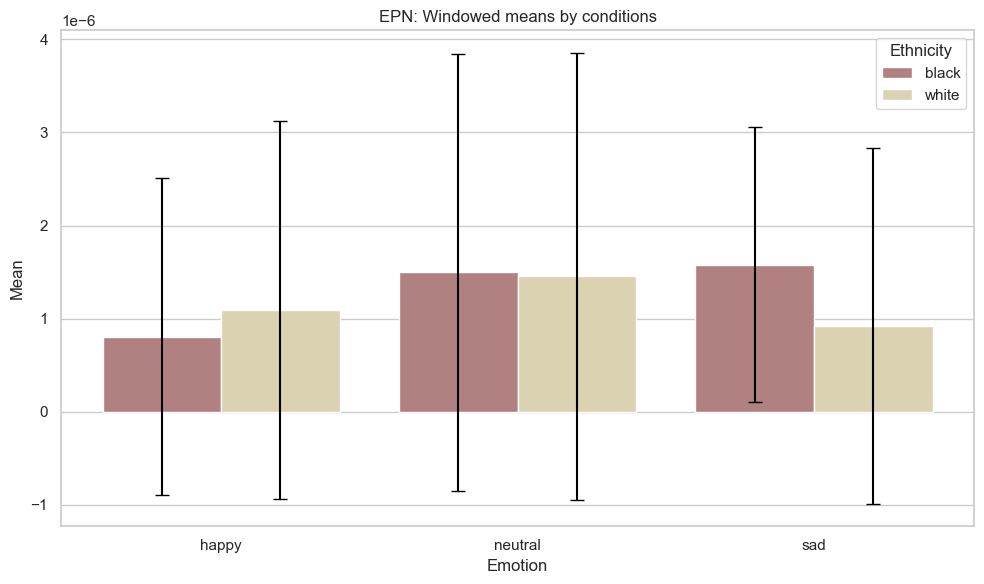

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Assuming df is already defined and loaded with data
# Fit the model
model = mixedlm('Mean ~ C(Ethnicity) * C(Emotion)', data=df, groups=df['Subject'])
anova_results = model.fit()

# Extract coefficients and standard errors from the fitted model
params = anova_results.params
std_err = anova_results.bse

# Extract conditions from the model summary
conditions = params.index.tolist()

# Plot with error bars
plt.figure(figsize=(12, 8))
plt.errorbar(range(len(params)), params, yerr=std_err, fmt='o', markersize=8, capsize=5, color='lightpink', ecolor='hotpink', linestyle='-', linewidth=2)
plt.title("Mixed Linear Model Regression Results", fontsize=16)
plt.xlabel("Conditions", fontsize=14)
plt.ylabel("Coefficients", fontsize=14)
plt.xticks(ticks=range(len(conditions)), labels=conditions, rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

### PLOT MEAN
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean and standard deviation for each combination of Ethnicity and Emotion
mean_data = df.groupby(['Ethnicity', 'Emotion'])['Mean'].mean().reset_index()
std_data = df.groupby(['Ethnicity', 'Emotion'])['Mean'].std().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(x="Emotion", y="Mean", hue="Ethnicity", data=mean_data, palette='pink')

# Add custom error bars
for i, bar in enumerate(plt.gca().patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.errorbar(x, y, yerr=std_data.iloc[i]['Mean'], color='black', capsize=5)

plt.title("EPN: Windowed means by conditions")
plt.xlabel("Emotion")
plt.ylabel("Mean")
plt.tight_layout()
plt.show()


# P300

In [89]:
# chosen channels for anova
picks = ['CP1', 'CP2', 'P3', 'Pz', 'P4'] 

# time window for anova
tmin = 0.35
tmax = 0.8

# make lists for labels in conditions
ethnicity_labels = ['white', 'black']
emotion_labels = ['happy', 'neutral', 'sad']
data = []

# WE want combinations of ethnicity and emotion, so we loop over all of the epochs conditions
## ADDED SUBJECT HERE
for i, epochs in enumerate(all_epochs):
    for ethnicity in ethnicity_labels:
        for emotion in emotion_labels:
                current_epochs = epochs[f'{emotion}/{ethnicity}']
                data_current = current_epochs.get_data(picks=picks, tmin=tmin, tmax=tmax)
                data_mean = np.mean(data_current, axis=(0, 1, 2))
                # append the mean data, labels, and subject ID to the list
                data.append([i, ethnicity, emotion, data_mean])

# Make to dataframe
df = pd.DataFrame(data, columns=['Subject', 'Ethnicity', 'Emotion', 'Mean'])

## FIT ANOVA

# Fit model with subject as group level
model = mixedlm('Mean ~ C(Ethnicity) * C(Emotion)', data=df, groups=df['Subject'])
anova_result = model.fit()

# Print the summary of the model
summary = anova_result.summary().as_latex()
print(summary)


\begin{table}
\caption{Mixed Linear Model Regression Results}
\label{}
\begin{center}
\begin{tabular}{llll}
\hline
Model:            & MixedLM & Dependent Variable: & Mean     \\
No. Observations: & 12      & Method:             & REML     \\
No. Groups:       & 2       & Scale:              & 0.0000   \\
Min. group size:  & 6       & Log-Likelihood:     & 74.5061  \\
Max. group size:  & 6       & Converged:          & Yes      \\
Mean group size:  & 6.0     &                     &          \\
\hline
\end{tabular}
\end{center}

\begin{center}
\begin{tabular}{lrrrrrr}
\hline
                                            &  Coef. & Std.Err. &      z & P$> |$z$|$ & [0.025 & 0.975]  \\
\hline
Intercept                                   &  0.000 &    0.000 &  3.021 &       0.003 &  0.000 &  0.000  \\
C(Ethnicity)[T.white]                       & -0.000 &    0.000 & -0.188 &       0.851 & -0.000 &  0.000  \\
C(Emotion)[T.neutral]                       & -0.000 &    0.000 & -1.416 &       0.157

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


# Plot

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


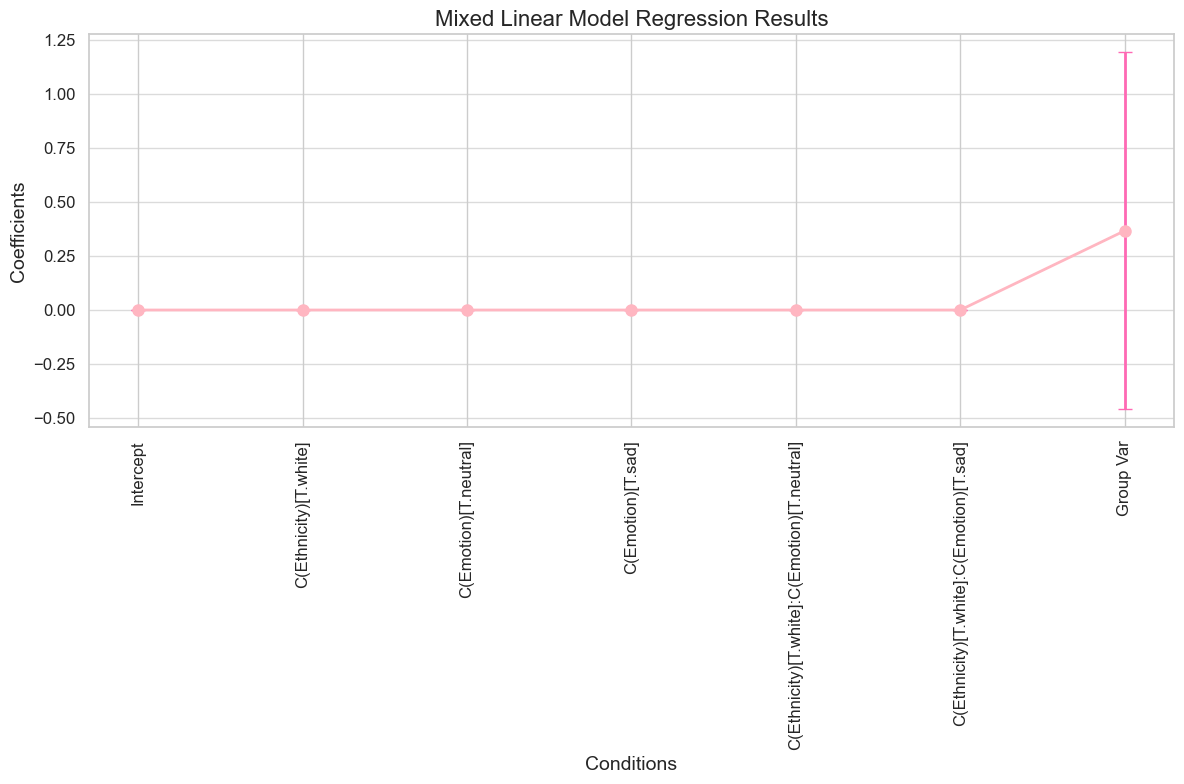

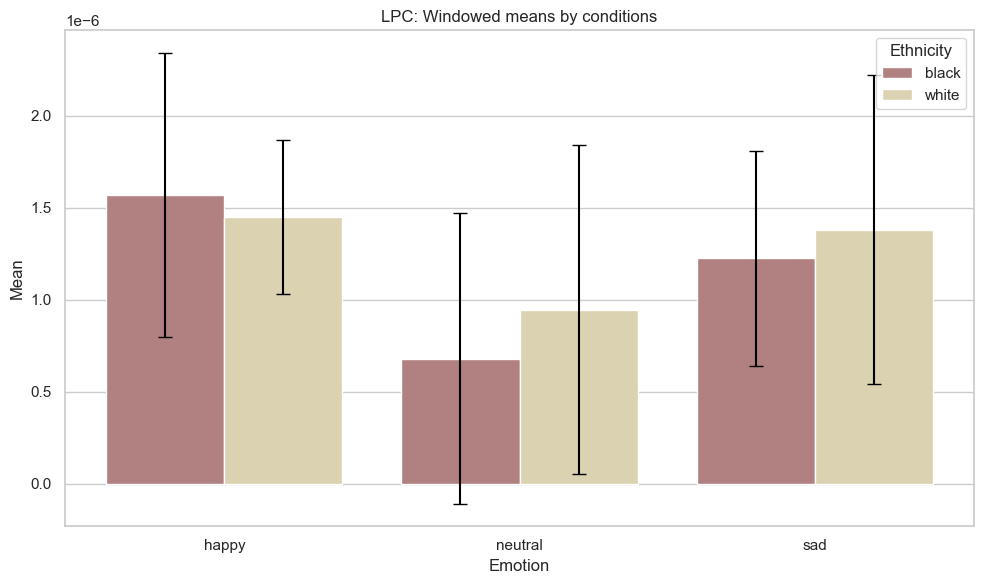

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Assuming df is already defined and loaded with data
# Fit the model
model = mixedlm('Mean ~ C(Ethnicity) * C(Emotion)', data=df, groups=df['Subject'])
anova_results = model.fit()

# Extract coefficients and standard errors from the fitted model
params = anova_results.params
std_err = anova_results.bse

# Extract conditions from the model summary
conditions = params.index.tolist()

# Plot with error bars
plt.figure(figsize=(12, 8))
plt.errorbar(range(len(params)), params, yerr=std_err, fmt='o', markersize=8, capsize=5, color='lightpink', ecolor='hotpink', linestyle='-', linewidth=2)
plt.title("Mixed Linear Model Regression Results", fontsize=16)
plt.xlabel("Conditions", fontsize=14)
plt.ylabel("Coefficients", fontsize=14)
plt.xticks(ticks=range(len(conditions)), labels=conditions, rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()


### PLOT MEAN
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean and standard deviation for each combination of Ethnicity and Emotion
mean_data = df.groupby(['Ethnicity', 'Emotion'])['Mean'].mean().reset_index()
std_data = df.groupby(['Ethnicity', 'Emotion'])['Mean'].std().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(x="Emotion", y="Mean", hue="Ethnicity", data=mean_data, palette='pink')

# Add custom error bars
for i, bar in enumerate(plt.gca().patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.errorbar(x, y, yerr=std_data.iloc[i]['Mean'], color='black', capsize=5)

plt.title("LPC: Windowed means by conditions")
plt.xlabel("Emotion")
plt.ylabel("Mean")
plt.tight_layout()
plt.show()